<a href="https://colab.research.google.com/github/mightfight/Collab/blob/main/Random_forest_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install scikit-learn
!pip install matplotlib
! pip install imbalanced-learn

!pip install albumentations
#!pip install split-folders
#import splitfolders
#splitfolders.ratio('/content/drive/MyDrive/grain_images', output="output", seed=1337, ratio=(1, 0,0))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas.core.generic import pickle
import pickle




In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import torch
import torchvision
from torch import nn
import albumentations as A
transform_h = A.Compose([A.HorizontalFlip(p=1)])
transform_v = A.Compose([A.VerticalFlip(p=1)])
transform_c = A.Compose([A.HueSaturationValue(p=1),A.RandomBrightnessContrast(p=1)])




# Define the paths to your image dataset
#clean_path = '/content/output/train/clean'
#damaged_path = '/content/output/train/damaged'
#discolored_path = '/content/output/train/discolored'

clean_path = '/content/drive/MyDrive/grain_images/clean'
damaged_path = '/content/drive/MyDrive/grain_images/damaged'
discolored_path = '/content/drive/MyDrive/grain_images/discolored'

def load_images(path, label):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize the images to a fixed size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
           # transformed_h = transform_h(image=img)
            #transformed_h_image = transformed_h["image"]
            #transformed_v = transform_v(image=img)
            #transformed_v_image = transformed_v["image"]
            #transformed_c = transform_c(image=img)
            #transformed_c_image = transformed_c["image"]
            images.append(img)



            #images.append(transformed_h_image)
            #images.append(transformed_v_image)
            #images.append(transformed_c_image)

            labels.append(label)
            return images, labels

clean_images, clean_labels = load_images(clean_path, 0)
damaged_images, damaged_labels = load_images(damaged_path, 1)
discolored_images, discolored_labels = load_images(discolored_path, 2)

images = clean_images + damaged_images + discolored_images
labels = clean_labels + damaged_labels + discolored_labels


images = np.array(images)
labels = np.array(labels)

# Split the data into train and test without using train_test_split
X_train = images
y_train = labels


smote = SMOTE()

X_train_flat = X_train.reshape(X_train.shape[0], -1)
y_train_flat = y_train.reshape(y_train.shape[0], -1)

print(X_train_flat.shape)
print(y_train.shape)
X_train_smote,y_train_smote= smote.fit_resample(X_train_flat, y_train)





clean_path_1 = '/content/drive/MyDrive/z_seg2_qaqc/clean'
damaged_path_1 = '/content/drive/MyDrive/z_seg2_qaqc/damaged'
discolored_path_1 = '/content/drive/MyDrive/z_seg2_qaqc/discolored'



def load_images(path, label):
    images_1 = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(path, filename))
           # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize the images to a fixed size
            images_1.append(img)
            labels.append(label)
    return images_1, labels

clean_images_1, clean_labels_1 = load_images(clean_path_1, 0)
damaged_images_1, damaged_labels_1 = load_images(damaged_path_1, 1)
discolored_images_1, discolored_labels_1 = load_images(discolored_path_1, 2)

test_images = clean_images_1 + damaged_images_1 + discolored_images_1
test_labels = clean_labels_1 + damaged_labels_1 + discolored_labels_1


test_images = np.array(test_images)
test_labels = np.array(test_labels)

X_test = test_images
y_test = test_labels



(3, 30000)
(3,)


Accuracy: 0.6036866359447005


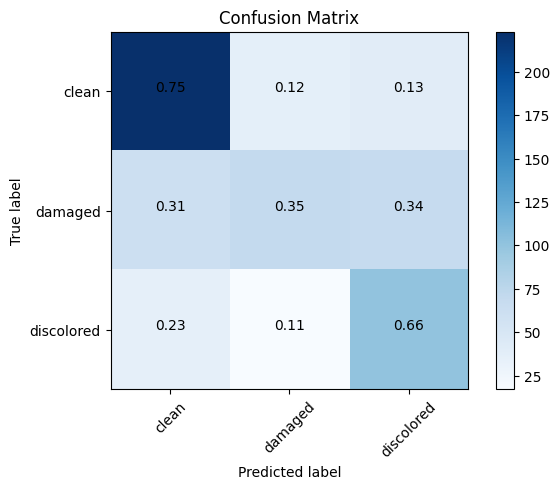

In [ ]:

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=60)

# Flatten the images to 1D arrays
X_train_flat = X_train_smote.reshape(X_train_smote.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train_smote)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['clean', 'damaged', 'discolored']

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Normalize confusion matrix
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Add labels to the plot
thresh = cnf_matrix.max() / 2.0
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, "{:.2f}".format(cnf_matrix_norm[i, j]),
             horizontalalignment="center",
             color="white" if cnf_matrix_norm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.5774267005400787


In [ ]:
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes Classifier
nb_classifier = GaussianNB()

# Flatten the images to 1D arrays
X_train_flat = X_train_smote.reshape(X_train_smote.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the classifier
nb_classifier.fit(X_train_flat, y_train_smote)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['clean', 'damaged', 'discolored']

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Normalize confusion matrix
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Add labels to the plot
thresh = cnf_matrix.max() / 2.0
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, "{:.2f}".format(cnf_matrix_norm[i, j]),
             horizontalalignment="center",
             color="white" if cnf_matrix_norm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:

print(img.shape(X_train_flat))